<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/04.01-Visualizacao-de-Dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Visualização de Dados: Plotly Express e Dash

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))

Adaptado de: [*Plotly Open Source Graphing Library for Python*](https://plotly.com/python/)


## Visualização de Dados: Plotly Express

Plotly é uma biblioteca de gráficos para Python cria gráficos interativos com qualidade para pronta publicação. Com ela podemos criar gráficos de linha, gráficos de dispersão, gráficos de área, gráficos de barras, barras de erro, gráficos de caixa, histogramas, mapas de calor, subplots, múltiplos eixos, gráficos polares e gráficos de bolhas. 

Plotly.py é gratuita e de código aberto disponível no [GitHub](https://github.com/plotly/plotly.py).

O processo de renderização usa a biblioteca JavaScript [Plotly.js](https://plotly.com/javascript/), embora raramente seja preciso interagir com a biblioteca Javascript diretamente. 


As figuras podem ser representadas em Python como `dicts` ou como instâncias da classe `plotly.graph_objects.Figure`, e são serializadas como texto em JSON antes de serem passadas para Plotly.js.

#### Importando Plotly



Assim como usamos a abreviatura `np` para NumPy e `pd` para Pandas, usaremos algumas abreviações padrão para importações do Matplotlib:

In [1]:
import plotly.graph_objects as go

#### Plotando a partir de um notebook IPython 



No notebook IPython você também tem a opção de incorporar gráficos Plotly diretamente no notebook


Pode-se criar uma figura diretamente com `plotly.graph_objects.Figure()`.

In [2]:
import plotly.graph_objects as go

fig = go.Figure()
fig

Em Plotly, uma figura é representada como um dicionário aninhado contendo os componentes gráficos.

A estrutura base inclui:
1. `data`: lista de traces (gráficos como linhas, barras, dispersão, etc.).
2. `layout`: configurações visuais como títulos, eixos, legendas e estilos.

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = go.Figure(
    data = {'x':x, 'y':np.sin(x)},
    layout = {'title': 'Gráfico: sin(x)'}
)

fig

Visualizar a estrutura de dados subjacente para qualquer objeto `plotly.graph_objects.Figure` pode ser feito via `print(fig)` ou, no JupyterLab, com o renderizador especial `fig.show("json")`. 


In [4]:
print(fig)

Figure({
    'data': [{'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAAAAxb2dIzNu5PzFvZ0jM28' ... '7OkJgjQCIxb2dIzCNAAAAAAAAAJEA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAAABWWTD1i9C5P1FTX5rcrs' ... '3tlVXXvzzw4HCMOd2/Uk/z9Z5o4b8='),
                    'dtype': 'f8'}}],
    'layout': {'template': '...', 'title': {'text': 'Gráfico: sin(x)'}}
})


Ao construir uma figura, não é necessário preencher todos os atributos de cada objeto. No momento da renderização, a camada JavaScript calculará valores padrão para cada atributo obrigatório não especificado, dependendo dos que são especificados

In [5]:
fig.show("json")

Quando o parâmetro data em `go.Figure(data=...)` é uma lista, cada item dentro dessa lista representa um `trace` individual do gráfico.

Se os elementos da lista forem dicionários (como `{'x': x, 'y': np.sin(x)}`), o Plotly os interpreta como conjuntos de dados.

In [6]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[{'x':x, 'y':np.sin(x)},
          {'x':x, 'y':np.cos(x)}],
    layout={'showlegend':False}
)

fig

Podemos incluir explicitamente objetos do tipo `plotly.graph_objects`, como `go.Scatter`, `go.Bar`, etc.

In [7]:
fig = go.Figure(
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2]), 
          go.Bar(x=[1, 2, 3], y=[2, 1, 3]),],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object"),
    )
)

fig

Podemos usar a função `add_trace` para adicionar traços (traces) individuais a uma figura existente, permitindo a construção dinâmica de gráficos. Podemos ainda usar a função `update_layout` para personalizar atualizar o layout de uma figura existente sem precisar recriar toda a estrutura do gráfico.

In [8]:
fig = go.Figure()
fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2]))
fig.add_trace(go.Bar(x=[1, 2, 3], y=[2, 1, 3]))
fig.update_layout(title_text="A Figure Specified By A Graph Object")

fig

#### Criando figuras com plotly


Como visto, podemos construir uma figura completa passando especificações de `traces` e `layout` para o construtor `plotly.graph_objects.Figure`. Assim como o `matplotlib`, podemos ainda compor os gráficos por meio de `subplot`.

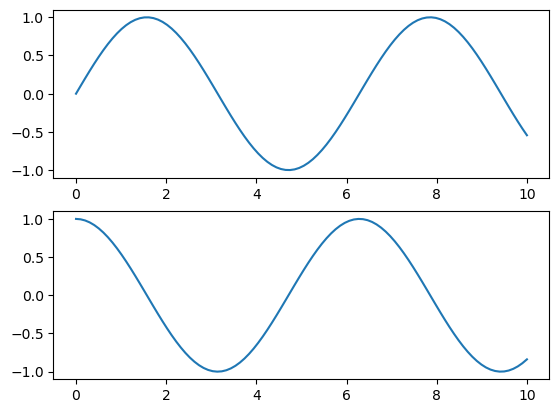

In [9]:
import matplotlib.pyplot as plt

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# # create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));



No Plotly, podemos criar subgráficos em uma única figura utilizando a função `make_subplots`, permitindo organizar múltiplos gráficos em uma estrutura personalizada:

In [10]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)

fig.add_trace({'x':x, 'y':np.sin(x)}, row=1, col=1)
fig.add_trace({'x':x, 'y':np.cos(x)}, row=2, col=1)
fig.update_layout(showlegend=False)

fig

Como alternativa ao método `add_trace()`, existem métodos no formato `add_{trace}` (onde `{trace}` é o nome de um tipo de traço) para construir e adicionar traços de cada tipo de traço.


In [11]:
fig = make_subplots(rows=1, cols=2)

fig.add_scatter(x=[0, 1, 2], y=[4, 2, 1], mode="lines", row=1, col=1)
fig.add_bar(x=[0, 1, 2], y=[2, 1, 3], row=1, col=2)

fig

## Plotly Express

O módulo `plotly.express` (geralmente importado como `px`) contém funções que podem criar figuras completas de uma só vez, sendo referido como Plotly Express ou PX. O Plotly Express é uma parte integrada da biblioteca `plotly` e é o ponto de partida recomendado para criar a maioria das figuras comuns. Cada função do Plotly Express utiliza internamente objetos gráficos e retorna uma instância de `plotly.graph_objects.Figure`. 


In [12]:
import plotly.express as px



O Plotly Express fornece mais de 30 funções para criar diferentes tipos de figuras. A API dessas funções foi cuidadosamente projetada para ser o mais consistente e fácil de aprender possível, facilitando a troca de um gráfico de dispersão para um gráfico de barras, um histograma ou um gráfico de raios solares durante uma sessão de exploração de dados. Role para baixo para ver uma galeria de gráficos do Plotly Express, cada um feito em uma única chamada de função.





Atualmente, o Plotly Express inclui as seguintes funções:

- **Básico**: `scatter`, `line`, `area`, `bar`, `funnel`, `timeline`
- **Parte-do-Todo**: `pie`, `sunburst`, `treemap`, `icicle`, `funnel_area`
- **Distribuições 1D**: `histogram`, `box`, `violin`, `strip`, `ecdf`
- **Distribuições 2D**: `density_heatmap`, `density_contour`
- **Entrada de Matriz ou Imagem**: `imshow`
- **3-Dimensional**: `scatter_3d`, `line_3d`
- **Multidimensional**: `scatter_matrix`, `parallel_coordinates`, `parallel_categories`
- **Mapas em Blocos**: `scatter_mapbox`, `line_mapbox`, `choropleth_mapbox`, `density_mapbox`
- **Mapas de Contorno**: `scatter_geo`, `line_geo`, `choropleth`
- **Gráficos Polares**: `scatter_polar`, `line_polar`, `bar_polar`
- **Gráficos Ternários**: `scatter_ternary`, `line_ternary`

#### Gráficos de dispersão

A função `px.scatter` permite representar cada ponto de dados como um marcador, com posições definidas pelas colunas x e y

In [13]:
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig

In [14]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig

In [15]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig

In [16]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", symbol='species')
fig

In [17]:
df = px.data.iris()
df["e"] = df["sepal_width"]/100
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", error_x="e", error_y="e")
fig

In [18]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig

In [19]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="petal_width",
                 size='petal_length')
fig

In [20]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="petal_width",
                 size='petal_length', facet_col='species')
fig

In [21]:
df = px.data.iris()
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
fig

#### Gráficos de linha

In [22]:
import numpy as np

t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
fig

In [23]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country', symbol="country")
fig

In [24]:
df = px.data.gapminder().query("continent == 'Oceania'")

fig = px.line(df, x="lifeExp", y="gdpPercap", color="country", text="year")
fig.update_traces(textposition="bottom right")
fig

#### Gráficos de barra


Com `px.bar`, cada linha do DataFrame é representada como uma marca retangular.

In [25]:
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig

In [26]:
df = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
fig

In [27]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='country',
             labels={'pop':'population'}, height=400)
fig

In [28]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='country',
             labels={'pop':'population'}, height=400,
             barmode='group')
fig

In [29]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='country',
             labels={'pop':'population'}, height=400,
             barmode='group', text_auto=True)
fig

In [30]:
df = px.data.gapminder().query("continent == 'Americas' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.2s',
            title="Default: various text sizes, positions and angles")
fig

In [31]:
df = px.data.gapminder().query("continent == 'Americas' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.2s',
            title="Controlled text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig

In [32]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='country',
             facet_col="country",
             labels={'pop':'population'}, height=400,
             barmode='group', text_auto=True)
fig

#### Coordenadas paralelas

O **gráfico de coordenadas paralelas** do Plotly Express (`px.parallel_coordinates`) representa cada linha de um DataFrame como uma **polilinha** que atravessa vários eixos paralelos, um para cada dimensão. Essa visualização é útil para explorar dados multivariados. 

In [33]:
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id",
                              dimensions=['sepal_width', 'sepal_length', 'petal_width',
                                          'petal_length'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig

#### Gráficos de área

`px.area` cria um gráfico de áreas empilhadas. Cada área preenchida corresponde a um valor da coluna especificada pelo parâmetro `line_group`.

In [34]:
df = px.data.gapminder()
fig = px.area(df, x="year", y="pop", color="continent", line_group="country")
fig

### Gráfico de pizza

Um gráfico de pizza é um gráfico estatístico circular, dividido em setores para ilustrar proporções numéricas.

No `px.pie`, os dados visualizados pelos setores da pizza são definidos em `values`. As etiquetas dos setores são definidas em `names`.

In [35]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig

In [36]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig

In [37]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
fig = px.pie(df, values='pop', names='country',
             title='Population of American continent',
             hover_data=['lifeExp'], labels={'lifeExp':'life expectancy'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig

In [38]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
pull_mask = df['country'].apply(lambda x: 0.2 if x == "Brazil" else 0)

fig = px.pie(df, values='pop', names='country',
             title='Population of American continent',
             hover_data=['lifeExp'], labels={'lifeExp':'life expectancy'})
fig.update_traces(textposition='inside', textinfo='percent+label', pull=pull_mask)

fig

In [39]:
df = px.data.gapminder().query("continent == 'Asia'")
fig = px.pie(df, values='pop', names='country')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig

In [40]:
df = px.data.tips()
fig = px.pie(df, values='tip', names='day', color='day',
             color_discrete_map={'Thur':'lightcyan',
                                 'Fri':'cyan',
                                 'Sat':'royalblue',
                                 'Sun':'darkblue'})
fig

### Histograma

In [41]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", y="tip", color="sex", marginal="rug", hover_data=df.columns)
fig

### Heatmap

In [42]:
df = px.data.iris()
fig = px.density_heatmap(df, x="sepal_width", y="sepal_length", marginal_x="rug", marginal_y="histogram")
fig

### Timeline

Um **gráfico de Gantt** é um tipo de gráfico de barras que ilustra o cronograma de um projeto. O gráfico lista as tarefas a serem realizadas no eixo vertical e os intervalos de tempo no eixo horizontal. A largura das barras horizontais no gráfico indica a duração de cada atividade.

In [43]:
import pandas as pd
df = pd.DataFrame({'Task':["Job A","Job B","Job C"],
                   'Start':['2009-01-01','2009-03-05','2009-02-20'],
                   'Finish':['2009-02-28','2009-04-15','2009-05-30'],
                   'Resource':['Alex','Alex','Max'],
                   'Completion_pct':[50,25,75]})
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Resource")
fig

In [44]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Completion_pct")
fig.update_yaxes(autorange="reversed")
fig

### Mapas

In [45]:
df = px.data.carshare()
fig = px.scatter_map(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  map_style="carto-positron")
fig

In [46]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_map(df, geojson=geojson, color="Bergeron",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           map_style="carto-positron", zoom=9)
fig

 ### Figuras animadas

Várias funções do Plotly Express permitem a criação de figuras animadas por meio dos argumentos `animation_frame` e `animation_group`.  

É importante sempre definir os parâmetros `x_range` e `y_range` para garantir que os dados permaneçam visíveis durante toda a animação.

In [47]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig

In [48]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig

In [49]:
df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig

In [50]:
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent", hover_name="country", size="pop",
               animation_frame="year", projection="natural earth")
fig

In [51]:
df = px.data.gapminder()
fig = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20,80])
fig

**Limitações e Considerações das Animações**

As animações funcionam melhor quando **cada linha de entrada está presente em todos os quadros** da animação e quando os valores categóricos mapeados para **símbolo, cor e facetas** permanecem constantes entre os quadros. Caso essas condições não sejam atendidas, a animação pode se tornar inconsistente ou enganosa.  



Embora o Plotly Express suporte animações para diversos tipos de gráficos e mapas, **transições suaves entre quadros** atualmente só são possíveis para os gráficos de **dispersão** e **barras**. 

### Gráficos 3D

In [52]:
df = px.data.iris()

fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width', 
    color='species', size='petal_length', labels={'species': 'Espécie'},
    opacity=0.82, color_continuous_scale='viridis'
)

fig

In [53]:
df = px.data.election()
fig = px.scatter_3d(df, x="Joly", y="Coderre", z="Bergeron", color="winner", size="total", hover_name="district",
                  symbol="result", color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
fig

## Dash

O [Dash](https://dash.plotly.com/) é uma framework open-source desenvolvida pelo Plotly para a criação de aplicações web interativas voltadas para análise de dados e visualização. Ele combina Python, HTML e JavaScript de forma simplificada, permitindo que cientistas de dados, analistas e desenvolvedores criem dashboards e ferramentas interativas sem precisar lidar diretamente com código frontend complexo.

```bash
pip install dash
```

Principais Características

- Baseado em Flask e React: O Dash usa **Flask** para o backend e **React.js** para renderizar os componentes interativos.  
- Componentes Reutilizáveis: Possui bibliotecas como `dash.dcc` (Dash Core Components) e `dash.html` (HTML Components) que oferecem gráficos, dropdowns, botões e muito mais.  
- Interatividade: Utiliza callbacks para criar interações dinâmicas entre elementos da interface.  
- Integração com Plotly: Suporte nativo para gráficos interativos criados com **Plotly Express** e **Plotly Graph Objects**.  
- Sem necessidade de JavaScript: O Dash permite construir aplicações totalmente funcionais apenas com Python.  
- Compatível com Jupyter Notebook: Permite testar componentes e interações diretamente dentro do ambiente de notebooks.  



**Estrutura Básica de um App Dash**  

Um aplicativo Dash é composto por duas partes principais:  

**Layout** – Define a estrutura visual da aplicação (elementos da interface).  
**Callbacks** – Responsáveis por atualizar os elementos dinamicamente conforme as interações do usuário.  


In [3]:
from dash import Dash, html

app = Dash()
app.layout = [html.Div(children='Hello World')]
app.run()

In [4]:
from dash import Dash, html, dash_table, dcc
import pandas as pd
import plotly.express as px

df = px.data.gapminder()

app = Dash()

app.layout = [
    html.Div(children='My First App with Data and a Graph'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10),
    dcc.Graph(figure=px.histogram(df, x='continent', y='lifeExp', histfunc='avg'))
]

app.run()

In [5]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

df = px.data.gapminder()

app = Dash()

app.layout = [
    html.H1(children='Title of Dash App', style={'textAlign':'center'}),
    dcc.Dropdown(df.country.unique(), 'Canada', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
]

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):
    dff = df[df.country==value]
    return px.line(dff, x='year', y='pop')

app.run()

### Layout

No **Dash**, o **layout** define a estrutura visual da aplicação, ou seja, **como os componentes serão organizados na tela**. Ele é construído de forma declarativa utilizando elementos da biblioteca `dash.html` (para componentes HTML) e `dash.dcc` (para componentes interativos).  



**Estrutura do Layout**  

O layout do Dash é basicamente uma **árvore de componentes**, onde um **componente pai** pode conter **componentes filhos**.  


In [6]:
from dash import Dash, html

app = Dash()

# Definição do layout
app.layout = html.Div([
    html.H1("Título do Dashboard"),
    html.P("Este é um parágrafo."),
    html.Button("Clique Aqui", id="btn")
])

app.run()


O Dash oferece componentes que representam diretamente elementos HTML. Alguns exemplos incluem:  
- `html.Div()`: Divisão genérica (como `<div>`)  
- `html.H1()`, `html.H2()`, `html.H3()`: Cabeçalhos  
- `html.P()`: Parágrafo  
- `html.Button()`: Botão  
- `html.Img()`: Imagem  


O Dash permite personalizar o layout com **CSS**. Podemos usar:  
- Classes e IDs para aplicar estilos personalizados.  
- Propriedade `style` para definir estilos inline.  

In [7]:
from dash import Dash, html

app = Dash()

app.layout = html.Div([
    html.H1("Título", style={"color": "blue", "textAlign": "center"}),
    html.P("Parágrafo estilizado", className="meu-estilo"),
    html.Button("Clique Aqui", id="meu-botao", style={"backgroundColor": "lightgray", "borderRadius": "5px"})
], style={"padding": "20px", "border": "1px solid black"})

app.run()

O módulo **Dash Core Components** (`dash.dcc`) incluem um conjunto de componentes de alto nível, como **menus suspensos (dropdowns), gráficos, blocos de Markdown** e etc.  

Assim como todos os componentes do Dash, eles são descritos de forma **totalmente declarativa**. Cada opção configurável está disponível como um **argumento de palavra-chave** do componente.

In [8]:
from dash import Dash, html, dcc

app = Dash()

app.layout = html.Div([

    html.Div(children=[
        html.Label('Dropdown'),
        dcc.Dropdown(['New York City', 'Montréal', 'San Francisco'], 'Montréal'),

        html.Br(),
        html.Label('Multi-Select Dropdown'),
        dcc.Dropdown(['New York City', 'Montréal', 'San Francisco'],
                     ['Montréal', 'San Francisco'],
                     multi=True),

        html.Br(),
        html.Label('Radio Items'),
        dcc.RadioItems(['New York City', 'Montréal', 'San Francisco'], 'Montréal'),
    ], style={'padding': 10, 'flex': 1}),

    html.Div(children=[
        html.Label('Checkboxes'),
        dcc.Checklist(['New York City', 'Montréal', 'San Francisco'],
                      ['Montréal', 'San Francisco']
        ),

        html.Br(),
        html.Label('Text Input'),
        dcc.Input(value='MTL', type='text'),

        html.Br(),
        html.Label('Slider'),
        dcc.Slider(
            min=0,
            max=9,
            marks={i: f'Label {i}' if i == 1 else str(i) for i in range(1, 6)},
            value=5,
        ),
    ], style={'padding': 10, 'flex': 1}),
    

], style={'display': 'flex', 'flexDirection': 'row'})

app.run()


#### Exemplos

In [9]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash()

df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

app.run()

In [10]:
from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd

app = Dash()

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

fig.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Hello Dash',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Dash: A web application framework for your data.', style={
        'textAlign': 'center',
        'color': colors['text']
    }),

    dcc.Graph(
        id='example-graph-2',
        figure=fig
    )
])

app.run()

### Callbacks

Um **callback** é uma **função reativa** que conecta **entradas (inputs)** e **saídas (outputs)** para tornar a aplicação interativa.  

Os callbacks permitem que o layout da aplicação seja atualizado dinamicamente com base nas interações do usuário, como **cliques em botões**, **seleções em menus suspensos** ou **valores digitados em campos de entrada**.  


In [11]:
from dash import Dash, dcc, html, Input, Output, callback

app = Dash()

app.layout = html.Div([
    html.H6("Change the value in the text box to see callbacks in action!"),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input', value='initial value', type='text')
    ]),
    html.Br(),
    html.Div(id='my-output'),

])


@callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return f'Output: {input_value}'


app.run()

In [12]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px

import pandas as pd

df = px.data.gapminder()

app = Dash()

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['year'].min(),
        df['year'].max(),
        step=None,
        value=df['year'].min(),
        marks={str(year): str(year) for year in df['year'].unique()},
        id='year-slider'
    )
])


@callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]

    fig = px.scatter(filtered_df, x="gdpPercap", y="lifeExp",
                     size="pop", color="continent", hover_name="country",
                     log_x=True, size_max=55)

    fig.update_layout(transition_duration=500)

    return fig

app.run()

**Callback com múltiplas entradas**

In [13]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px

import pandas as pd

app = Dash()

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Fertility rate, total (births per woman)',
                id='xaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='xaxis-type',
                inline=True
            )
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Life expectancy at birth, total (years)',
                id='yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='yaxis-type',
                inline=True
            )
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),

    dcc.Graph(id='indicator-graphic'),

    dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        id='year--slider',
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()},

    )
])


@callback(
    Output('indicator-graphic', 'figure'),
    Input('xaxis-column', 'value'),
    Input('yaxis-column', 'value'),
    Input('xaxis-type', 'value'),
    Input('yaxis-type', 'value'),
    Input('year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
                     y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
                     hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    fig.update_xaxes(title=xaxis_column_name,
                     type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name,
                     type='linear' if yaxis_type == 'Linear' else 'log')

    return fig


app.run()

**Callback com múltiplas saídas**

In [14]:
from dash import Dash, dcc, html, Input, Output, callback

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Input(
        id='num-multi',
        type='number',
        value=5
    ),
    html.Table([
        html.Tr([html.Td(['x', html.Sup(2)]), html.Td(id='square')]),
        html.Tr([html.Td(['x', html.Sup(3)]), html.Td(id='cube')]),
        html.Tr([html.Td([2, html.Sup('x')]), html.Td(id='twos')]),
        html.Tr([html.Td([3, html.Sup('x')]), html.Td(id='threes')]),
        html.Tr([html.Td(['x', html.Sup('x')]), html.Td(id='x^x')]),
    ]),
])


@callback(
    Output('square', 'children'),
    Output('cube', 'children'),
    Output('twos', 'children'),
    Output('threes', 'children'),
    Output('x^x', 'children'),
    Input('num-multi', 'value'))
def callback_a(x):
    return x**2, x**3, 2**x, 3**x, x**x


app.run()

**Callbacks aninhados**

In [15]:
from dash import Dash, dcc, html, Input, Output, callback

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

all_options = {
    'America': ['New York City', 'San Francisco', 'Cincinnati'],
    'Canada': ['Montréal', 'Toronto', 'Ottawa']
}
app.layout = html.Div([
    dcc.RadioItems(
        list(all_options.keys()),
        'America',
        id='countries-radio',
    ),

    html.Hr(),

    dcc.RadioItems(id='cities-radio'),

    html.Hr(),

    html.Div(id='display-selected-values')
])


@callback(
    Output('cities-radio', 'options'),
    Input('countries-radio', 'value'))
def set_cities_options(selected_country):
    return [{'label': i, 'value': i} for i in all_options[selected_country]]


@callback(
    Output('cities-radio', 'value'),
    Input('cities-radio', 'options'))
def set_cities_value(available_options):
    return available_options[0]['value']


@callback(
    Output('display-selected-values', 'children'),
    Input('countries-radio', 'value'),
    Input('cities-radio', 'value'))
def set_display_children(selected_country, selected_city):
    return f'{selected_city} is a city in {selected_country}'


app.run()


### Visualizações interativas

O módulo **Dash Core Components (`dash.dcc`)** inclui um componente chamado **`dcc.Graph`**, que é utilizado para renderizar visualizações de dados interativas.

Algumas propriedades do `dcc.Graph` podem ser atualizadas automaticamente conforme a interação do usuário. As principais são:  

- `hoverData`: Atualiza quando o usuário passa o mouse sobre um ponto.  
- `clickData`: Atualiza ao clicar em um ponto do gráfico.  
- `selectedData`: Atualiza quando o usuário seleciona uma região do gráfico.  
- `relayoutData`: Atualiza quando o layout do gráfico muda (ex: zoom, arrastar).  

In [17]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Fertility rate, total (births per woman)',
                id='crossfilter-xaxis-column',
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-xaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Life expectancy at birth, total (years)',
                id='crossfilter-yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-yaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        id='crossfilter-year--slider',
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()}
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'),
    Input('crossfilter-yaxis-type', 'value'),
    Input('crossfilter-year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
            )
    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])
    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')
    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')
    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):
    fig = px.scatter(dff, x='Year', y='Value')
    fig.update_traces(mode='lines+markers')
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')
    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       text=title)
    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})
    return fig


@callback(
    Output('x-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'))
def update_x_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@callback(
    Output('y-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-yaxis-type', 'value'))
def update_y_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


app.run()

Capturando interações básicas em `dcc.Graph`:

In [18]:
from dash import Dash, dcc, html, Input, Output, callback

import plotly.express as px

import json
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

df = pd.DataFrame({
    "x": [1,2,1,2],
    "y": [1,2,3,4],
    "customdata": [1,2,3,4],
    "fruit": ["apple", "apple", "orange", "orange"]
})

fig = px.scatter(df, x="x", y="y", color="fruit", custom_data=["customdata"])

fig.update_layout(clickmode='event+select')

fig.update_traces(marker_size=20)

app.layout = html.Div([
    dcc.Graph(
        id='basic-interactions',
        figure=fig
    ),

    html.Div(className='row', children=[
        html.Div([
            dcc.Markdown("""
                **Hover Data**

                Mouse over values in the graph.
            """),
            html.Pre(id='hover-data', style=styles['pre'])
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Click Data**

                Click on points in the graph.
            """),
            html.Pre(id='click-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Selection Data**

                Choose the lasso or rectangle tool in the graph's menu
                bar and then select points in the graph.

                Note that if `layout.clickmode = 'event+select'`, selection data also
                accumulates (or un-accumulates) selected data if you hold down the shift
                button while clicking.
            """),
            html.Pre(id='selected-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Zoom and Relayout Data**

                Click and drag on the graph to zoom or click on the zoom
                buttons in the graph's menu bar.
                Clicking on legend items will also fire
                this event.
            """),
            html.Pre(id='relayout-data', style=styles['pre']),
        ], className='three columns')
    ])
])


@callback(
    Output('hover-data', 'children'),
    Input('basic-interactions', 'hoverData'))
def display_hover_data(hoverData):
    return json.dumps(hoverData, indent=2)


@callback(
    Output('click-data', 'children'),
    Input('basic-interactions', 'clickData'))
def display_click_data(clickData):
    return json.dumps(clickData, indent=2)


@callback(
    Output('selected-data', 'children'),
    Input('basic-interactions', 'selectedData'))
def display_selected_data(selectedData):
    return json.dumps(selectedData, indent=2)


@callback(
    Output('relayout-data', 'children'),
    Input('basic-interactions', 'relayoutData'))
def display_relayout_data(relayoutData):
    return json.dumps(relayoutData, indent=2)


app.run()

[2025-02-13 14:32:15,233] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/paulodetarso/.local/lib/python3.12/site-packages/dash/dash.py", line 1301, in dispatch
    cb = self.callback_map[output]
         ~~~~~~~~~~~~~~~~~^^^^^^^^
KeyError: 'x-time-series.figure'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/paulodetarso/.local/lib/python3.12/site-packages/flask/app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/paulodetarso/.local/lib/python3.12/site-packages/flask/app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/paulodetarso/.local/lib/python3.12/site-packages/flask/app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/hom